<a href="https://colab.research.google.com/github/Nair987/MSc-Project-/blob/main/FinalMScProject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#Taking CSV file from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Performing Exploratory Data Analysis

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


#Lisitng out the Columnn Names

In [4]:
column_list = (list(df.columns))
print(column_list)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


#Identifying the different datatypes present in the dataframe

In [5]:
print("Data types of the columns in the data frame:", df.dtypes)

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [6]:
print("Shape of the data frame:", df.shape)

Shape of the data frame: (284807, 31)


#Observing the detailed information about the dataframe

In [7]:
print("Information about the data frame:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Handling Missing Values

**Checking for any missing values present in each columns**

In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


#Observation

**We can see that there are no missing value present in the dataframe.**

#Outliers treatment

**As the whole dataset is transformed with PCA, so assuming that the outliers are already treated.**

**We are not performing any outliers treatment on the dataframe, though we still see outliers available.**

#Observing the distribution of our class

**Calculates the number of transactions that are classified as "Fraudulent" and "Non-Fraudulent"**

**It then computes the percentage of each class and stores it in "normal_share" and "fraud_share" variables, respectively.**

**Then prints out the percentage of Non-Fraudulent and Fraudulent transactions in the DataFrame using a formatted string.**

In [9]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


**Computes the percentage of normal and fraudulent transactions in the dataset, and calculates the imbalance percentage between the two.**

**The output includes the percentage of normal transactions and fraudulent transactions, as well as the imbalance percentage between the two.**

In [10]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)

 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034


In [11]:
imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Imbalance Percentage = 0.173047500131896


#Data Visualisation

**Creating a figure that displays two subplots side by side, with the left subplot showing the number of transactions in each class (0 or 1) and the right subplot showing the percentage of transactions in each class.**

**Creating bar charts for the two subplots using the 'plot' method of the pandas DataFrame 'classes'. The y-axis label of the left subplot is set to 'Number of Transactions', and the x-axis label is set to 'Class', with a title of 'Number of Class Distributions'. Similarly, the y-axis label of the right subplot is set to 'Percentage of Transactions', and the x-axis label is set to 'Class', with a title of 'Percentage of Distributions'.**

<Figure size 2000x600 with 0 Axes>

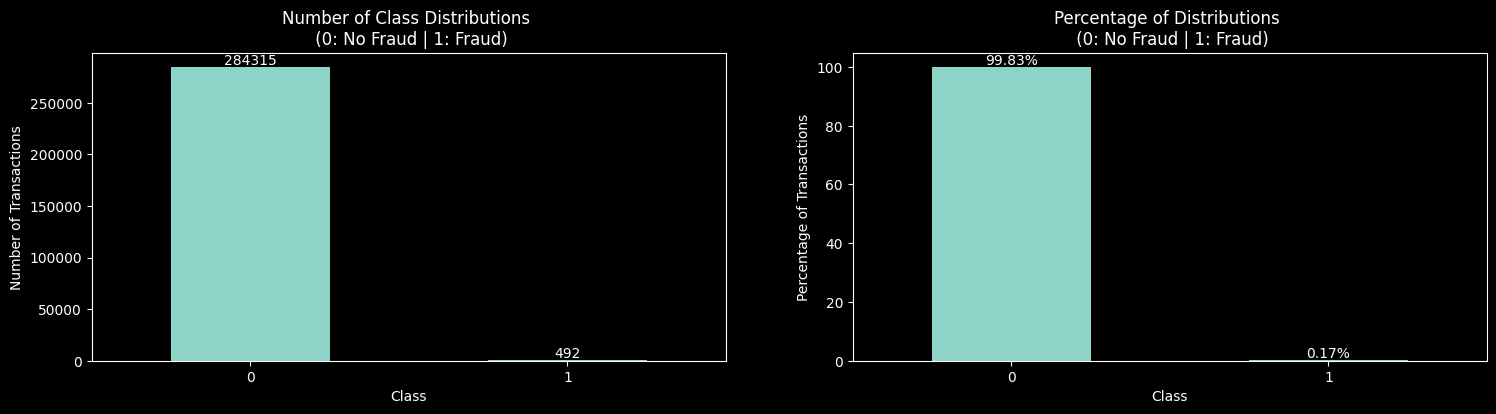

In [12]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')

    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')

    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

##Observation

**The dataset has very high imbalance class. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.**

**The percentage of distribution for majority class is 99.83% and minority class is 0.17%**

#Creating a scatter plot of Time vs Class with color-coded points and a legend.

**Creating a scatter plot of the Time variable on the x-axis and the Class variable on the y-axis.**

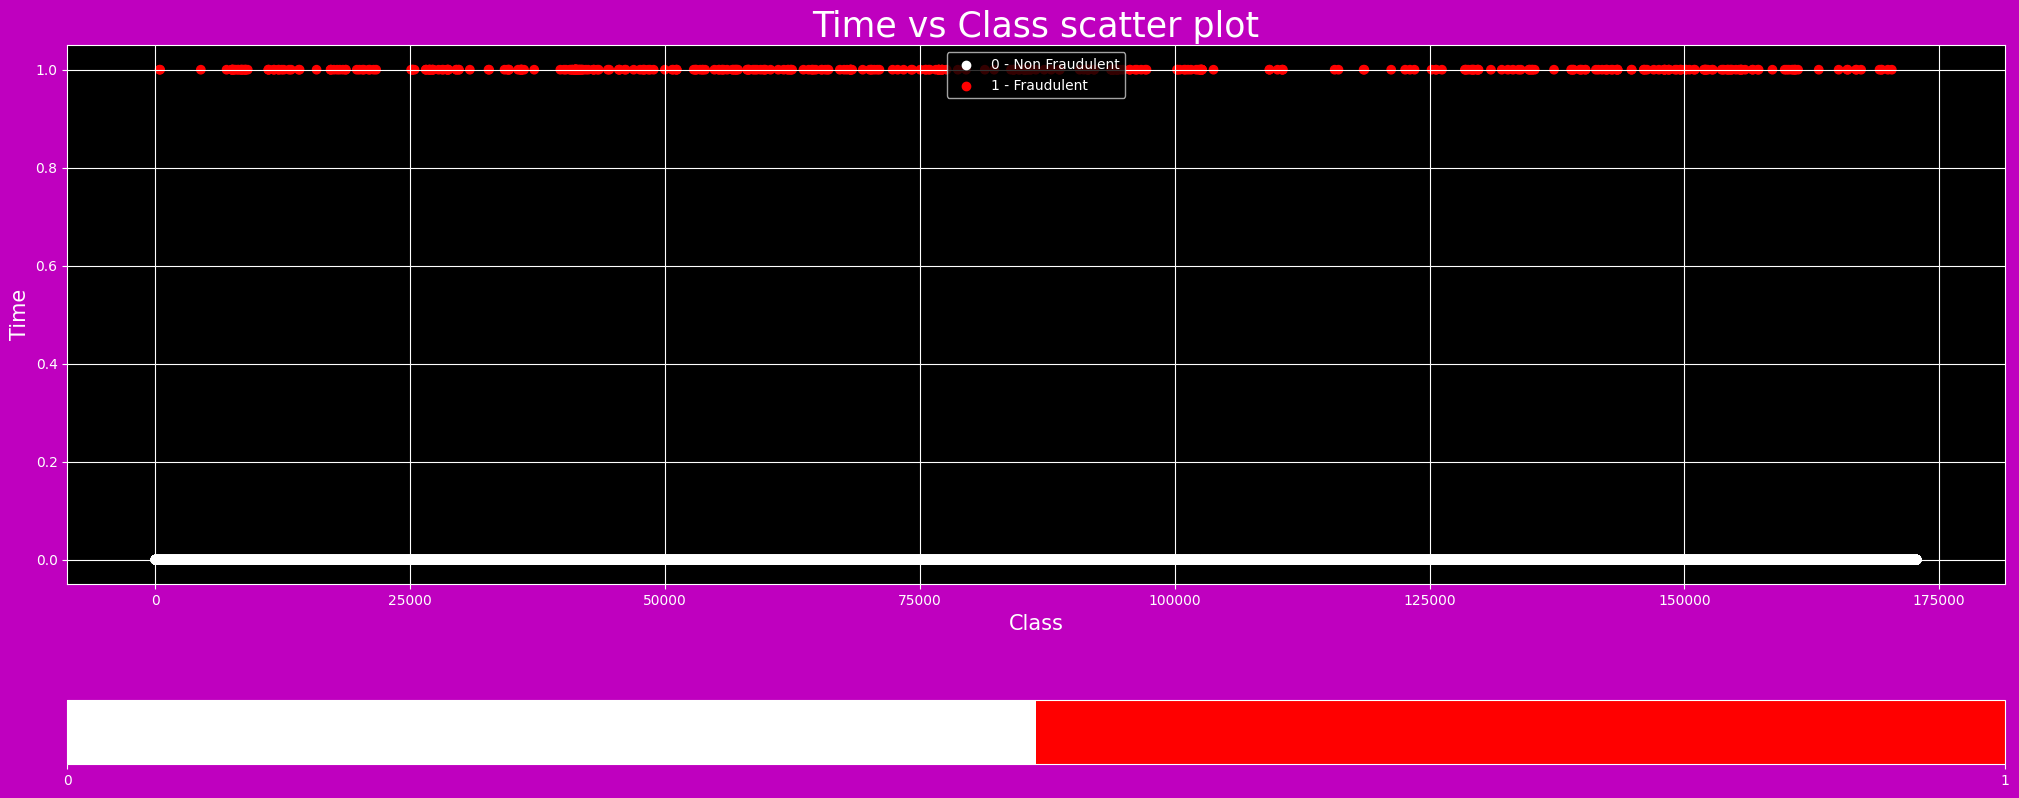

In [13]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(25,10), facecolor='m')

    # Using the cmap parameter to color-code the points
    plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Setting the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Time vs Class scatter plot", fontsize=25)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    plt.grid()

    # Creating a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

**The points in the plot are color-coded using the cmap parameter based on whether a transaction is fraudulent or not.**

**A colorbar is added to show the correspondence between color and class.**

**A legend is also added to clarify the colors used for each class.**



#Observation

**There is not much insight which can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.**

#Creating a scatter plot of Amount vs Class with color-coded points and a legend.

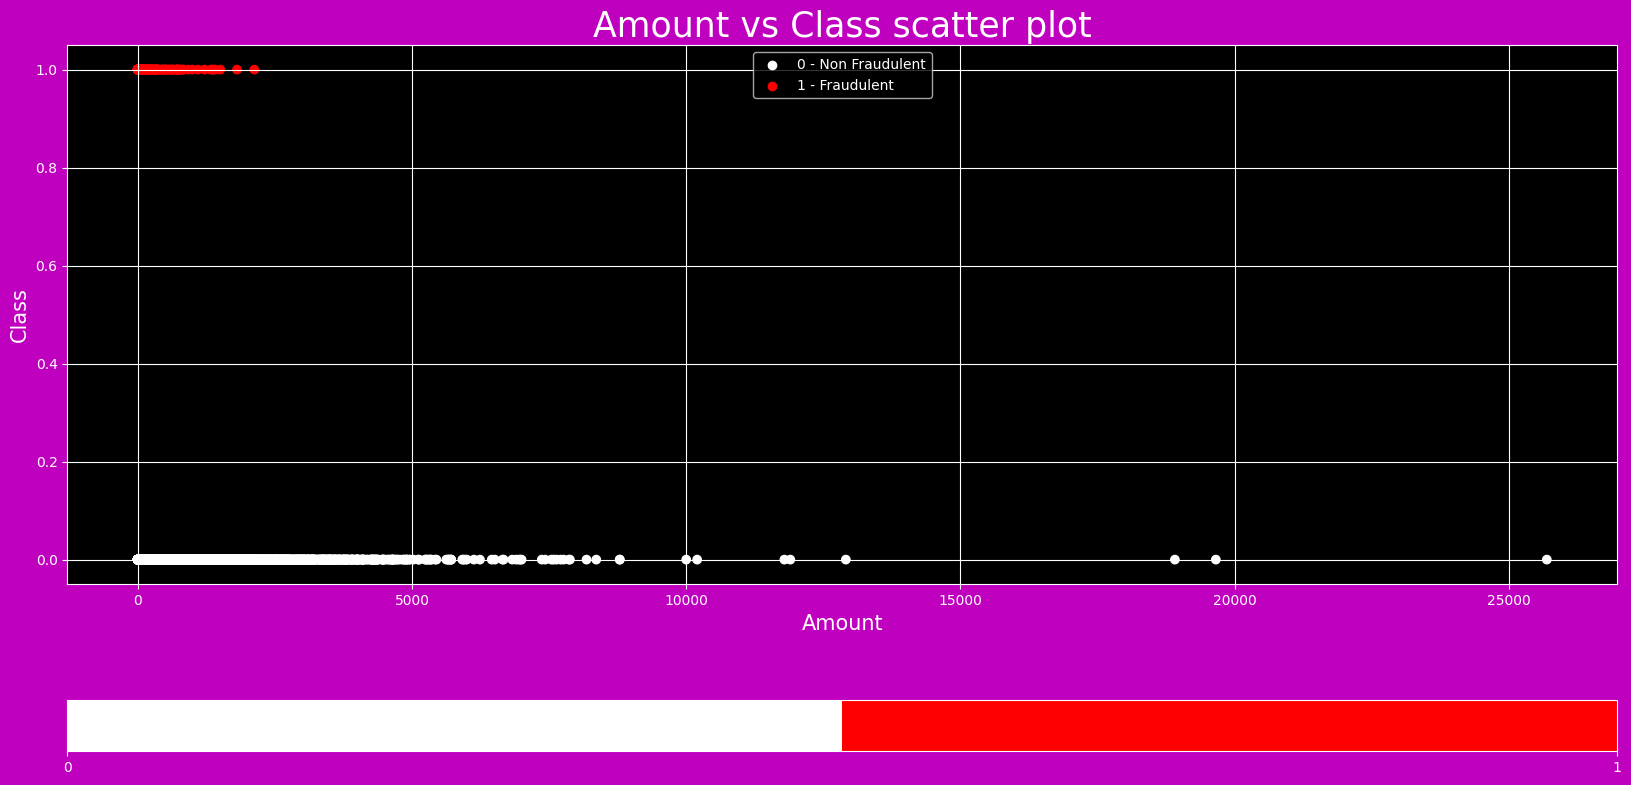

In [14]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='m')

    # Using the cmap parameter to color-code the points
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Setting the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Creating a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

#Observation

**Clearly low amount transactions are more likely to be fraudulent than high amount transaction.**

#Creating correlation matrix plot

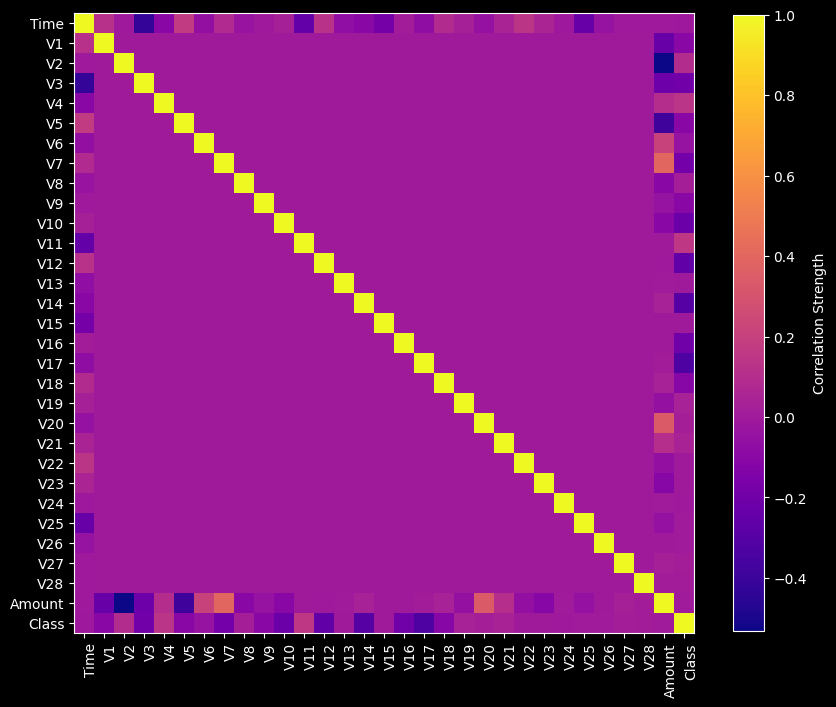

In [15]:
def corrplot(data):
 with plt.style.context('dark_background'):
      corr = data.corr()
      fig, ax = plt.subplots(figsize=(10, 10))
      im = ax.imshow(corr, cmap='plasma')
      ax.set_xticks(np.arange(len(data.columns)))
      ax.set_yticks(np.arange(len(data.columns)))
      ax.set_xticklabels(data.columns, rotation=90)
      ax.set_yticklabels(data.columns)
      plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
      plt.colorbar(im, aspect=20, shrink = 0.80 , pad = 0.05, label='Correlation Strength')
      plt.show()
corrplot(df)

#Observation

**There are no features but there is high correlatation , corr > .75**

#Plotting the distributions of all the features { Density Plots }

<Figure size 640x480 with 0 Axes>

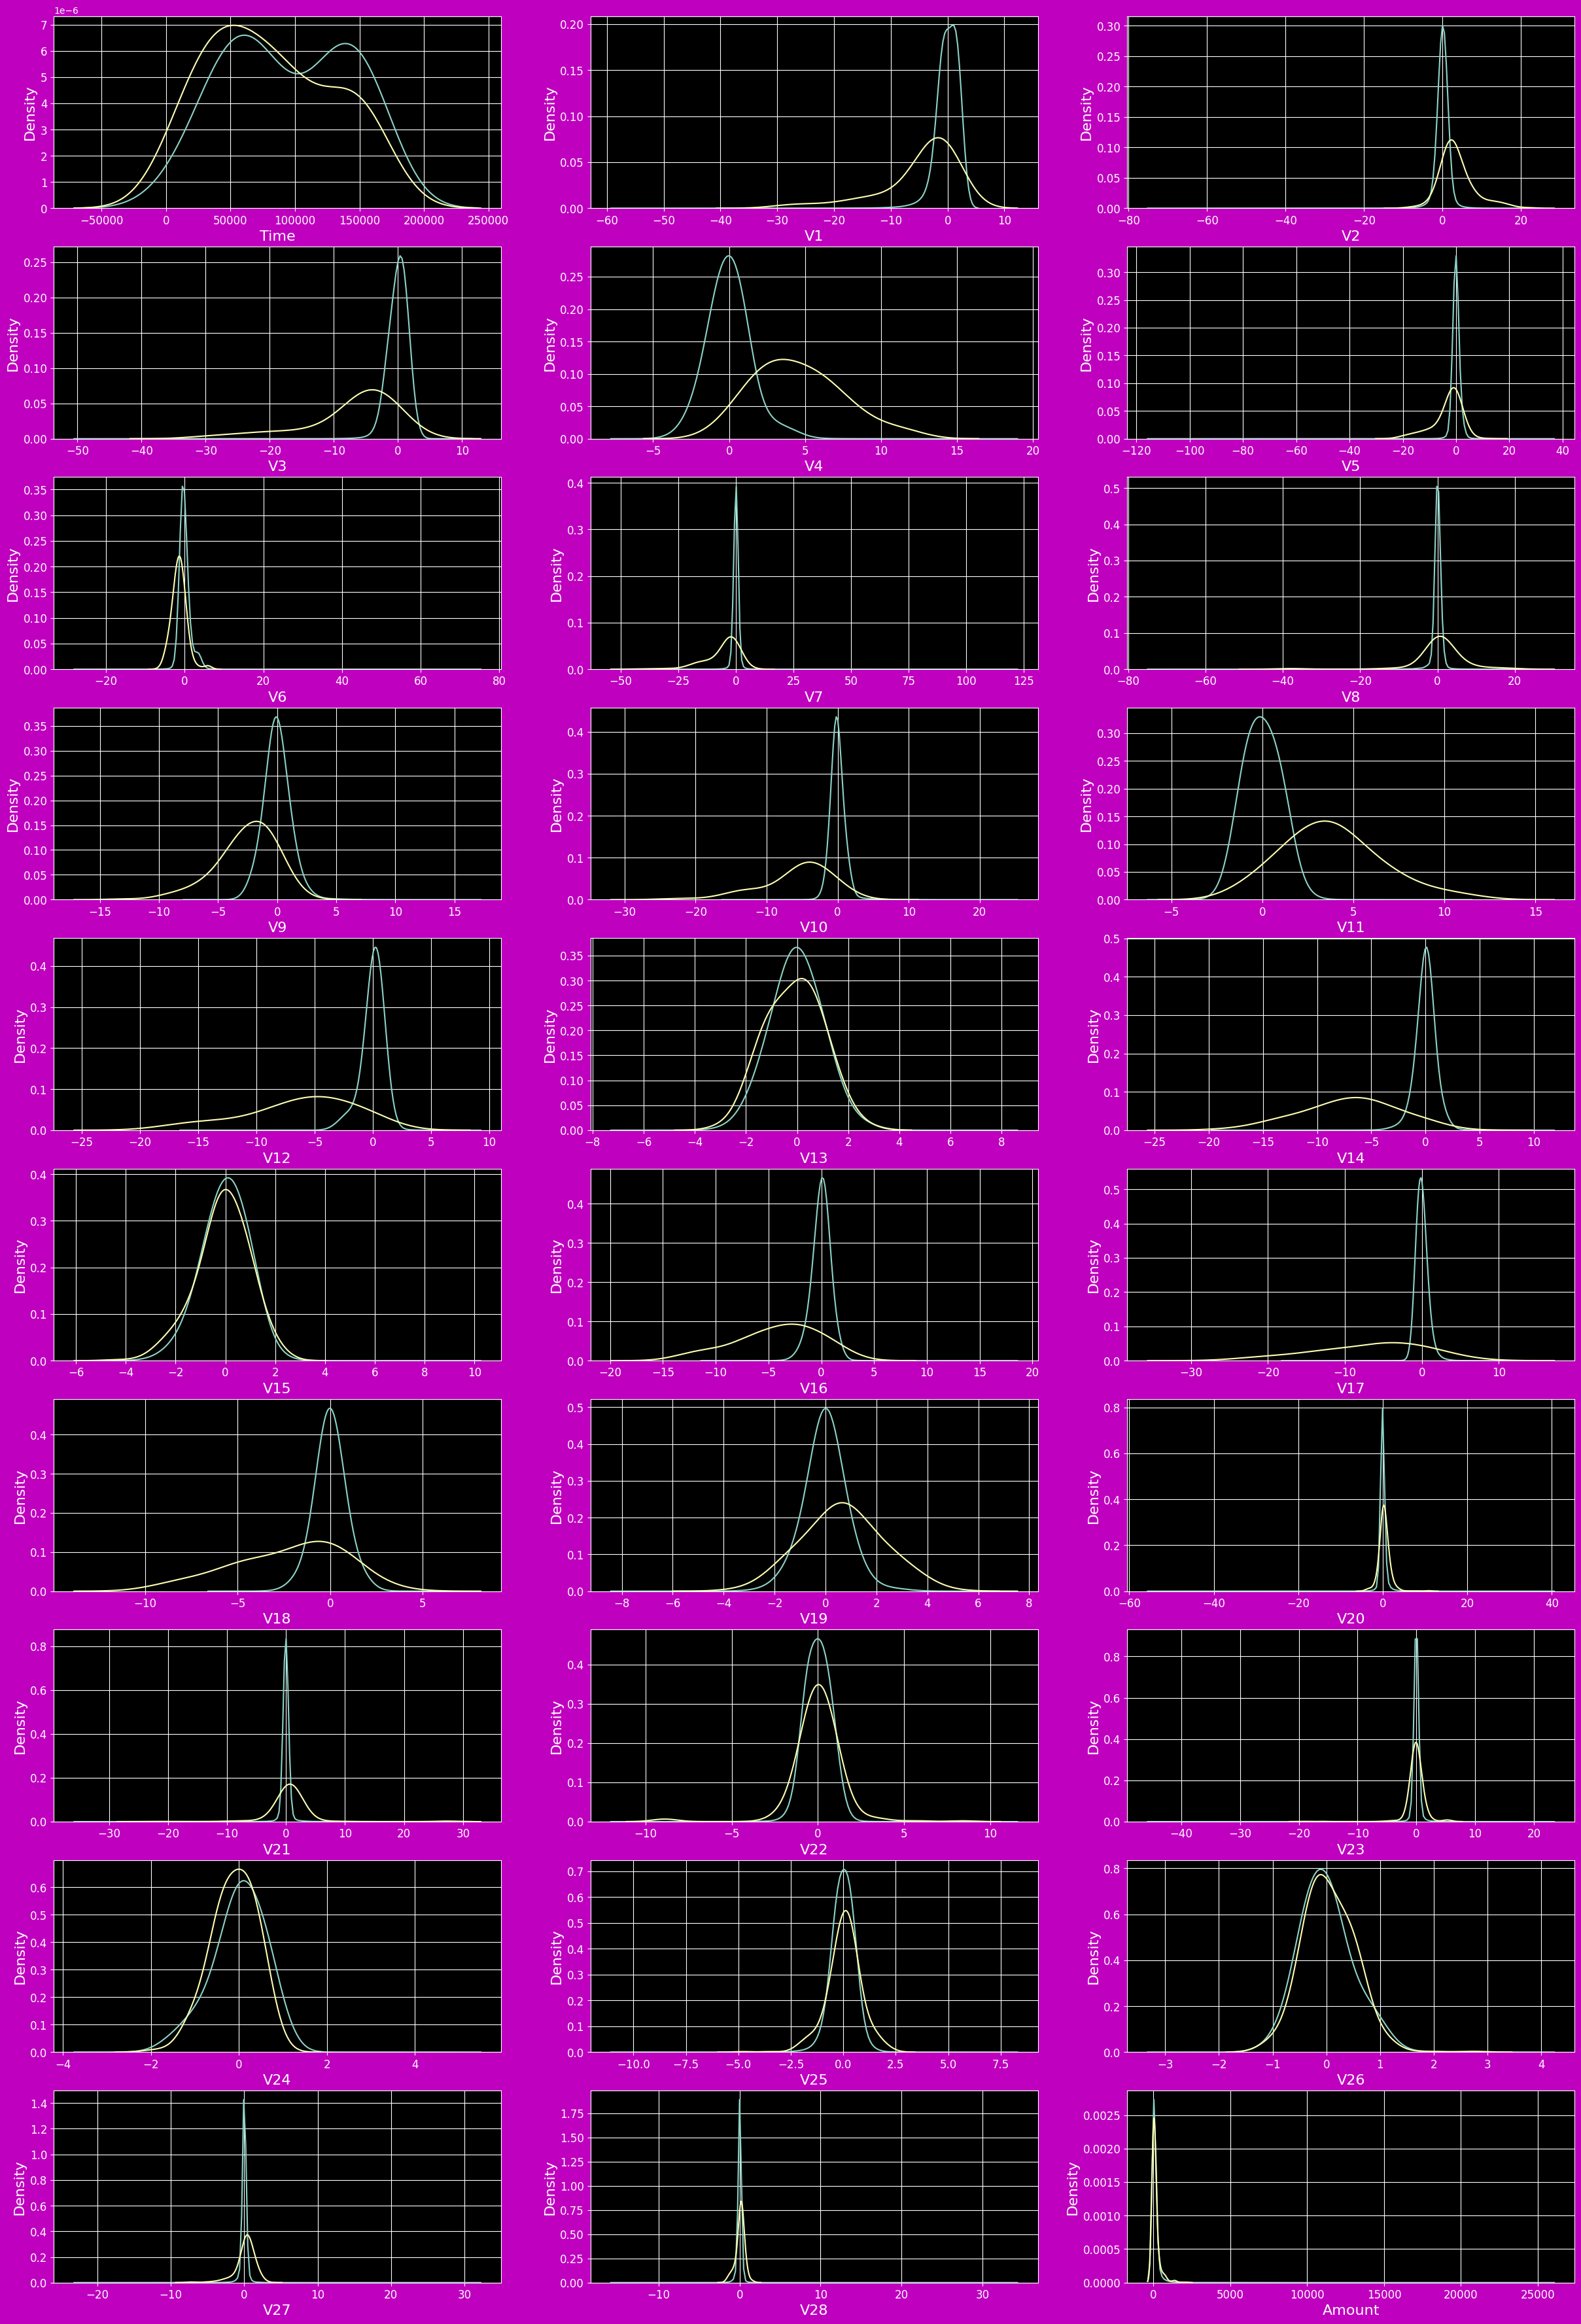

In [16]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

#Observation

**Most of the features distributions are overlapping for both the fraud and non-fraud transactions**

Dropping Time column as this feature is not going to help in the model building.

In [17]:
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


#**Splitting the data into train & test data**

In [18]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

#Checking the split of the class label

In [20]:
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


#Saving the testing set for evaluation

In [21]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


##Feature Scaling using RobustScaler Scaler

**Scalling Amount column**

**As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field**

In [22]:
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [23]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [24]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


#Checking Skewness

**Plotting the distribution of a variable**

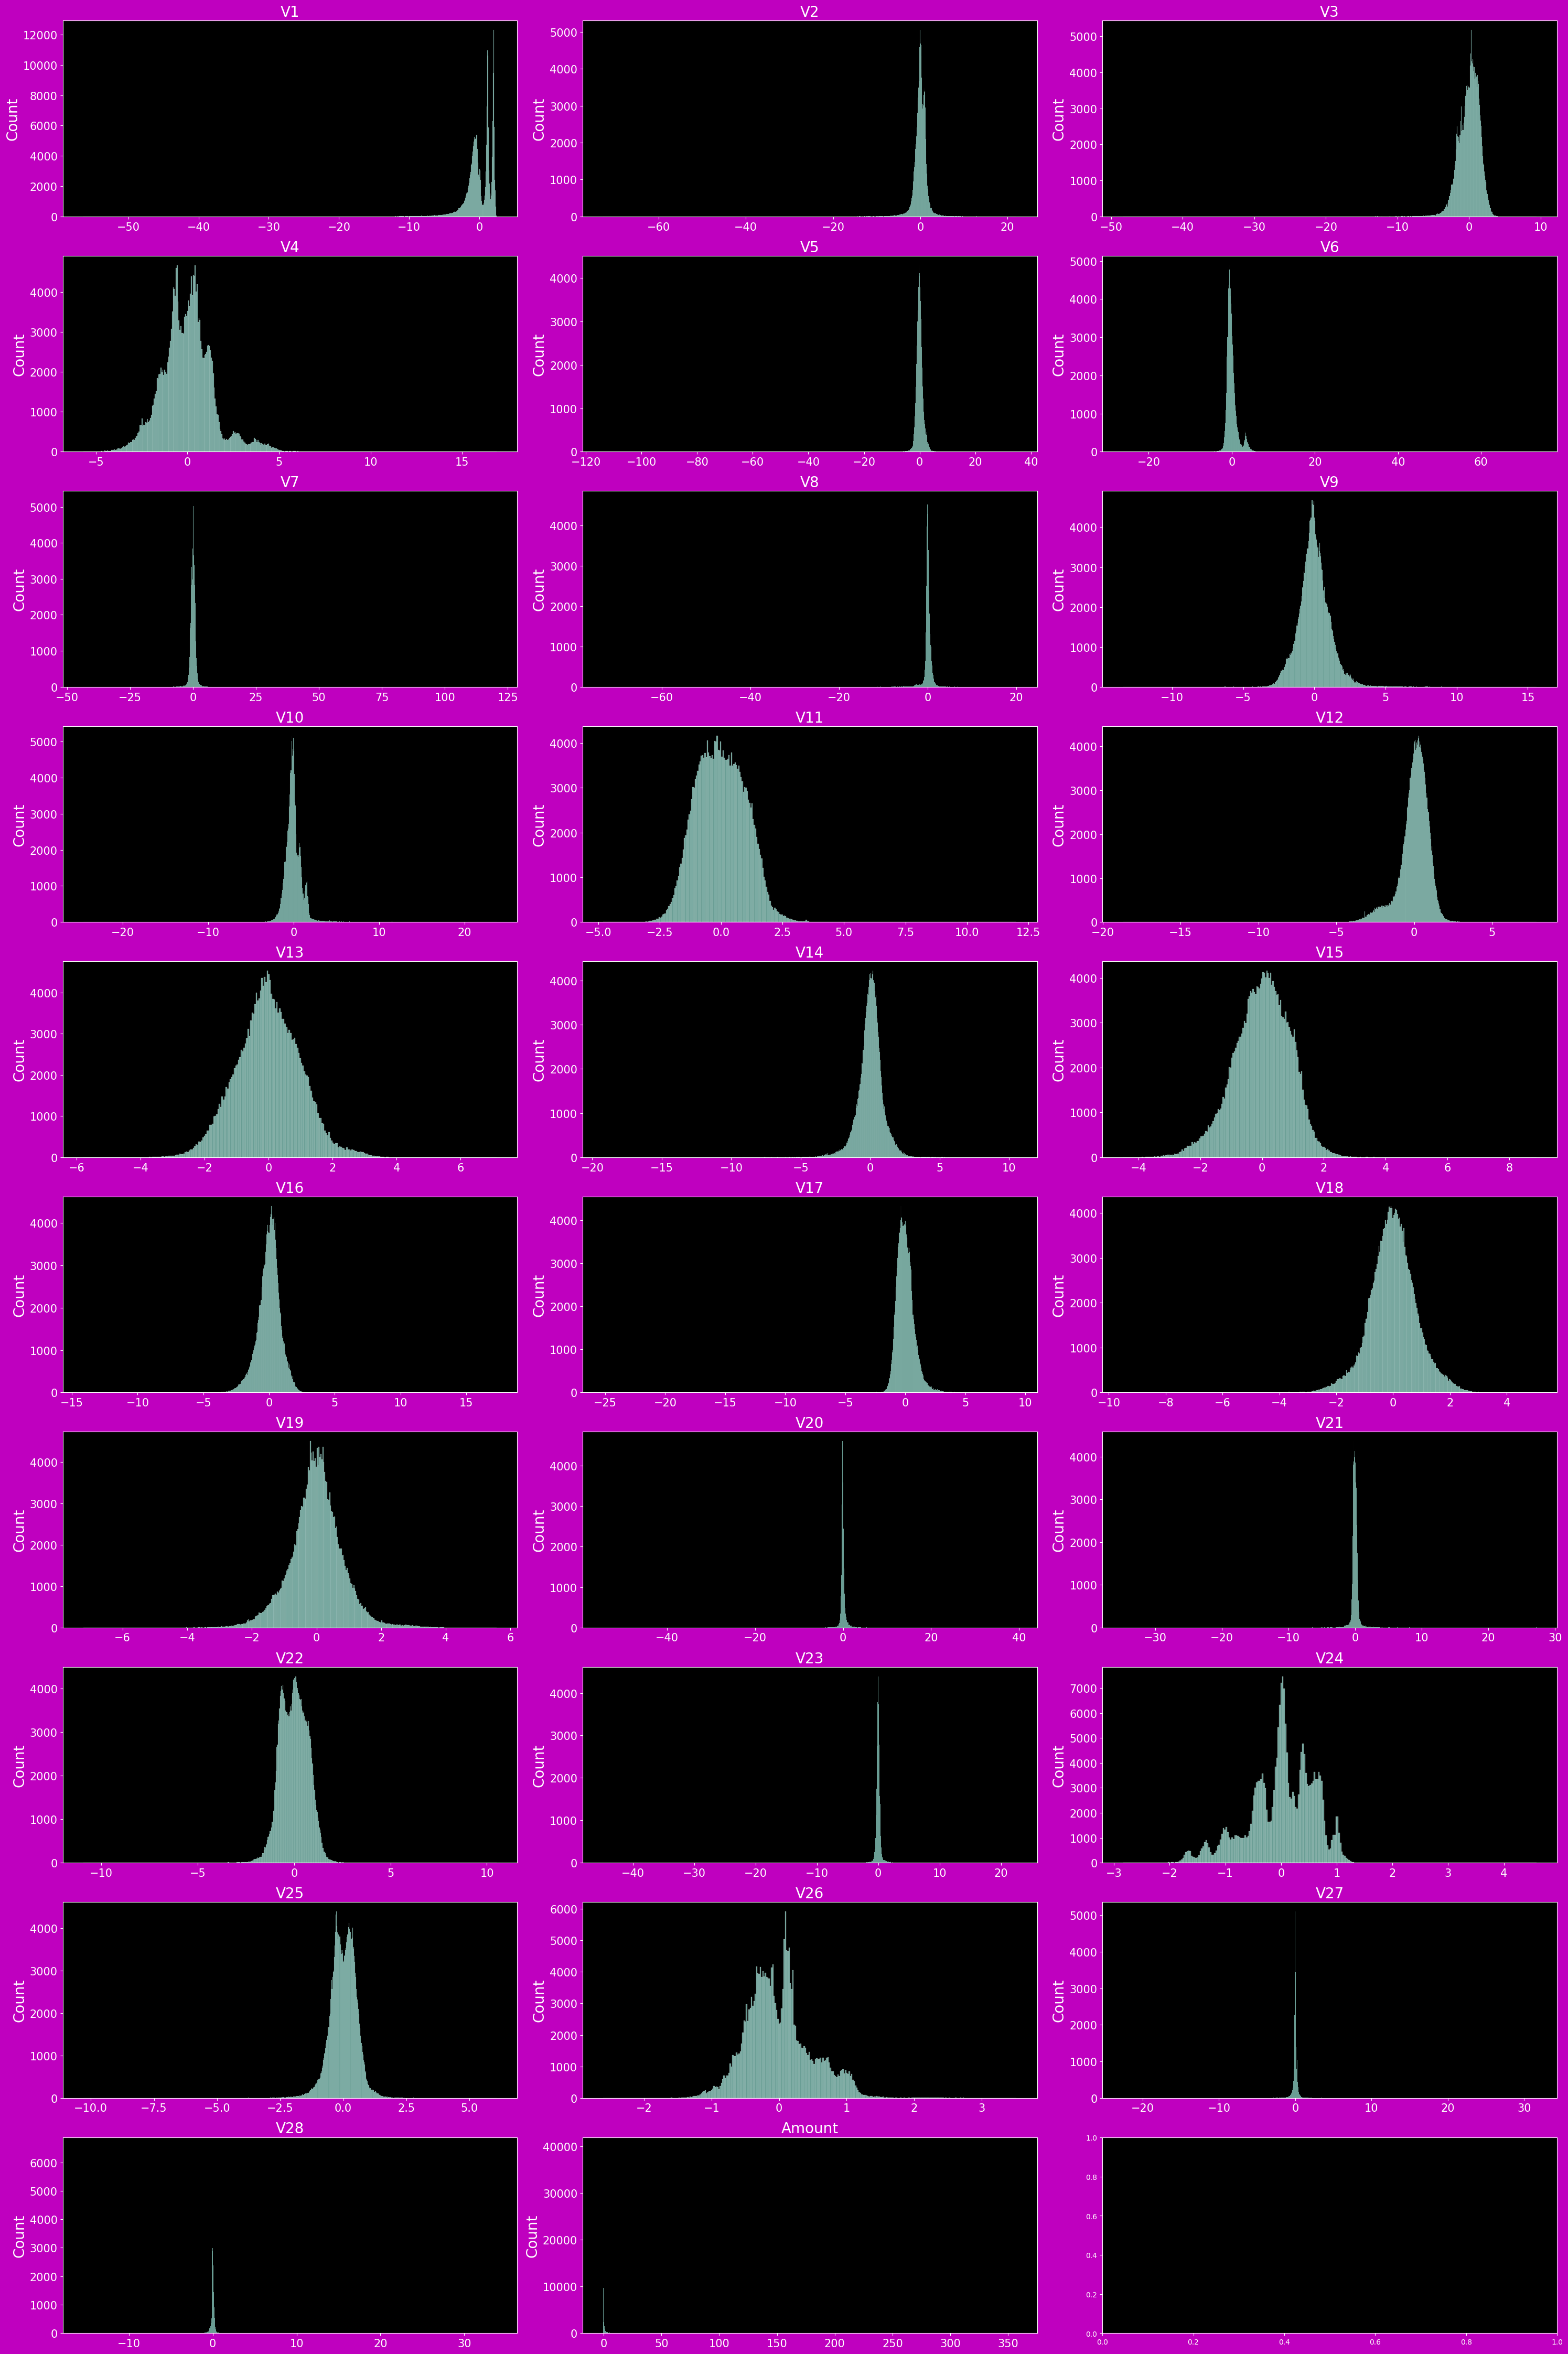

In [25]:
var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20)
            ax.set_ylabel("Count", fontsize=20)  # setting ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15)
            ax.set_xlabel('') # setting empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

#Observations

**Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.**

#Checking the skewness of the features

In [26]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


#Observation

**There is skewness present in the distribution**

#Filtering the features which has skewness less than -1 and greater than +1

In [27]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

#Treating Skewness

In [28]:
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creating an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [29]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


**Visualization of Data after Treating skewness**

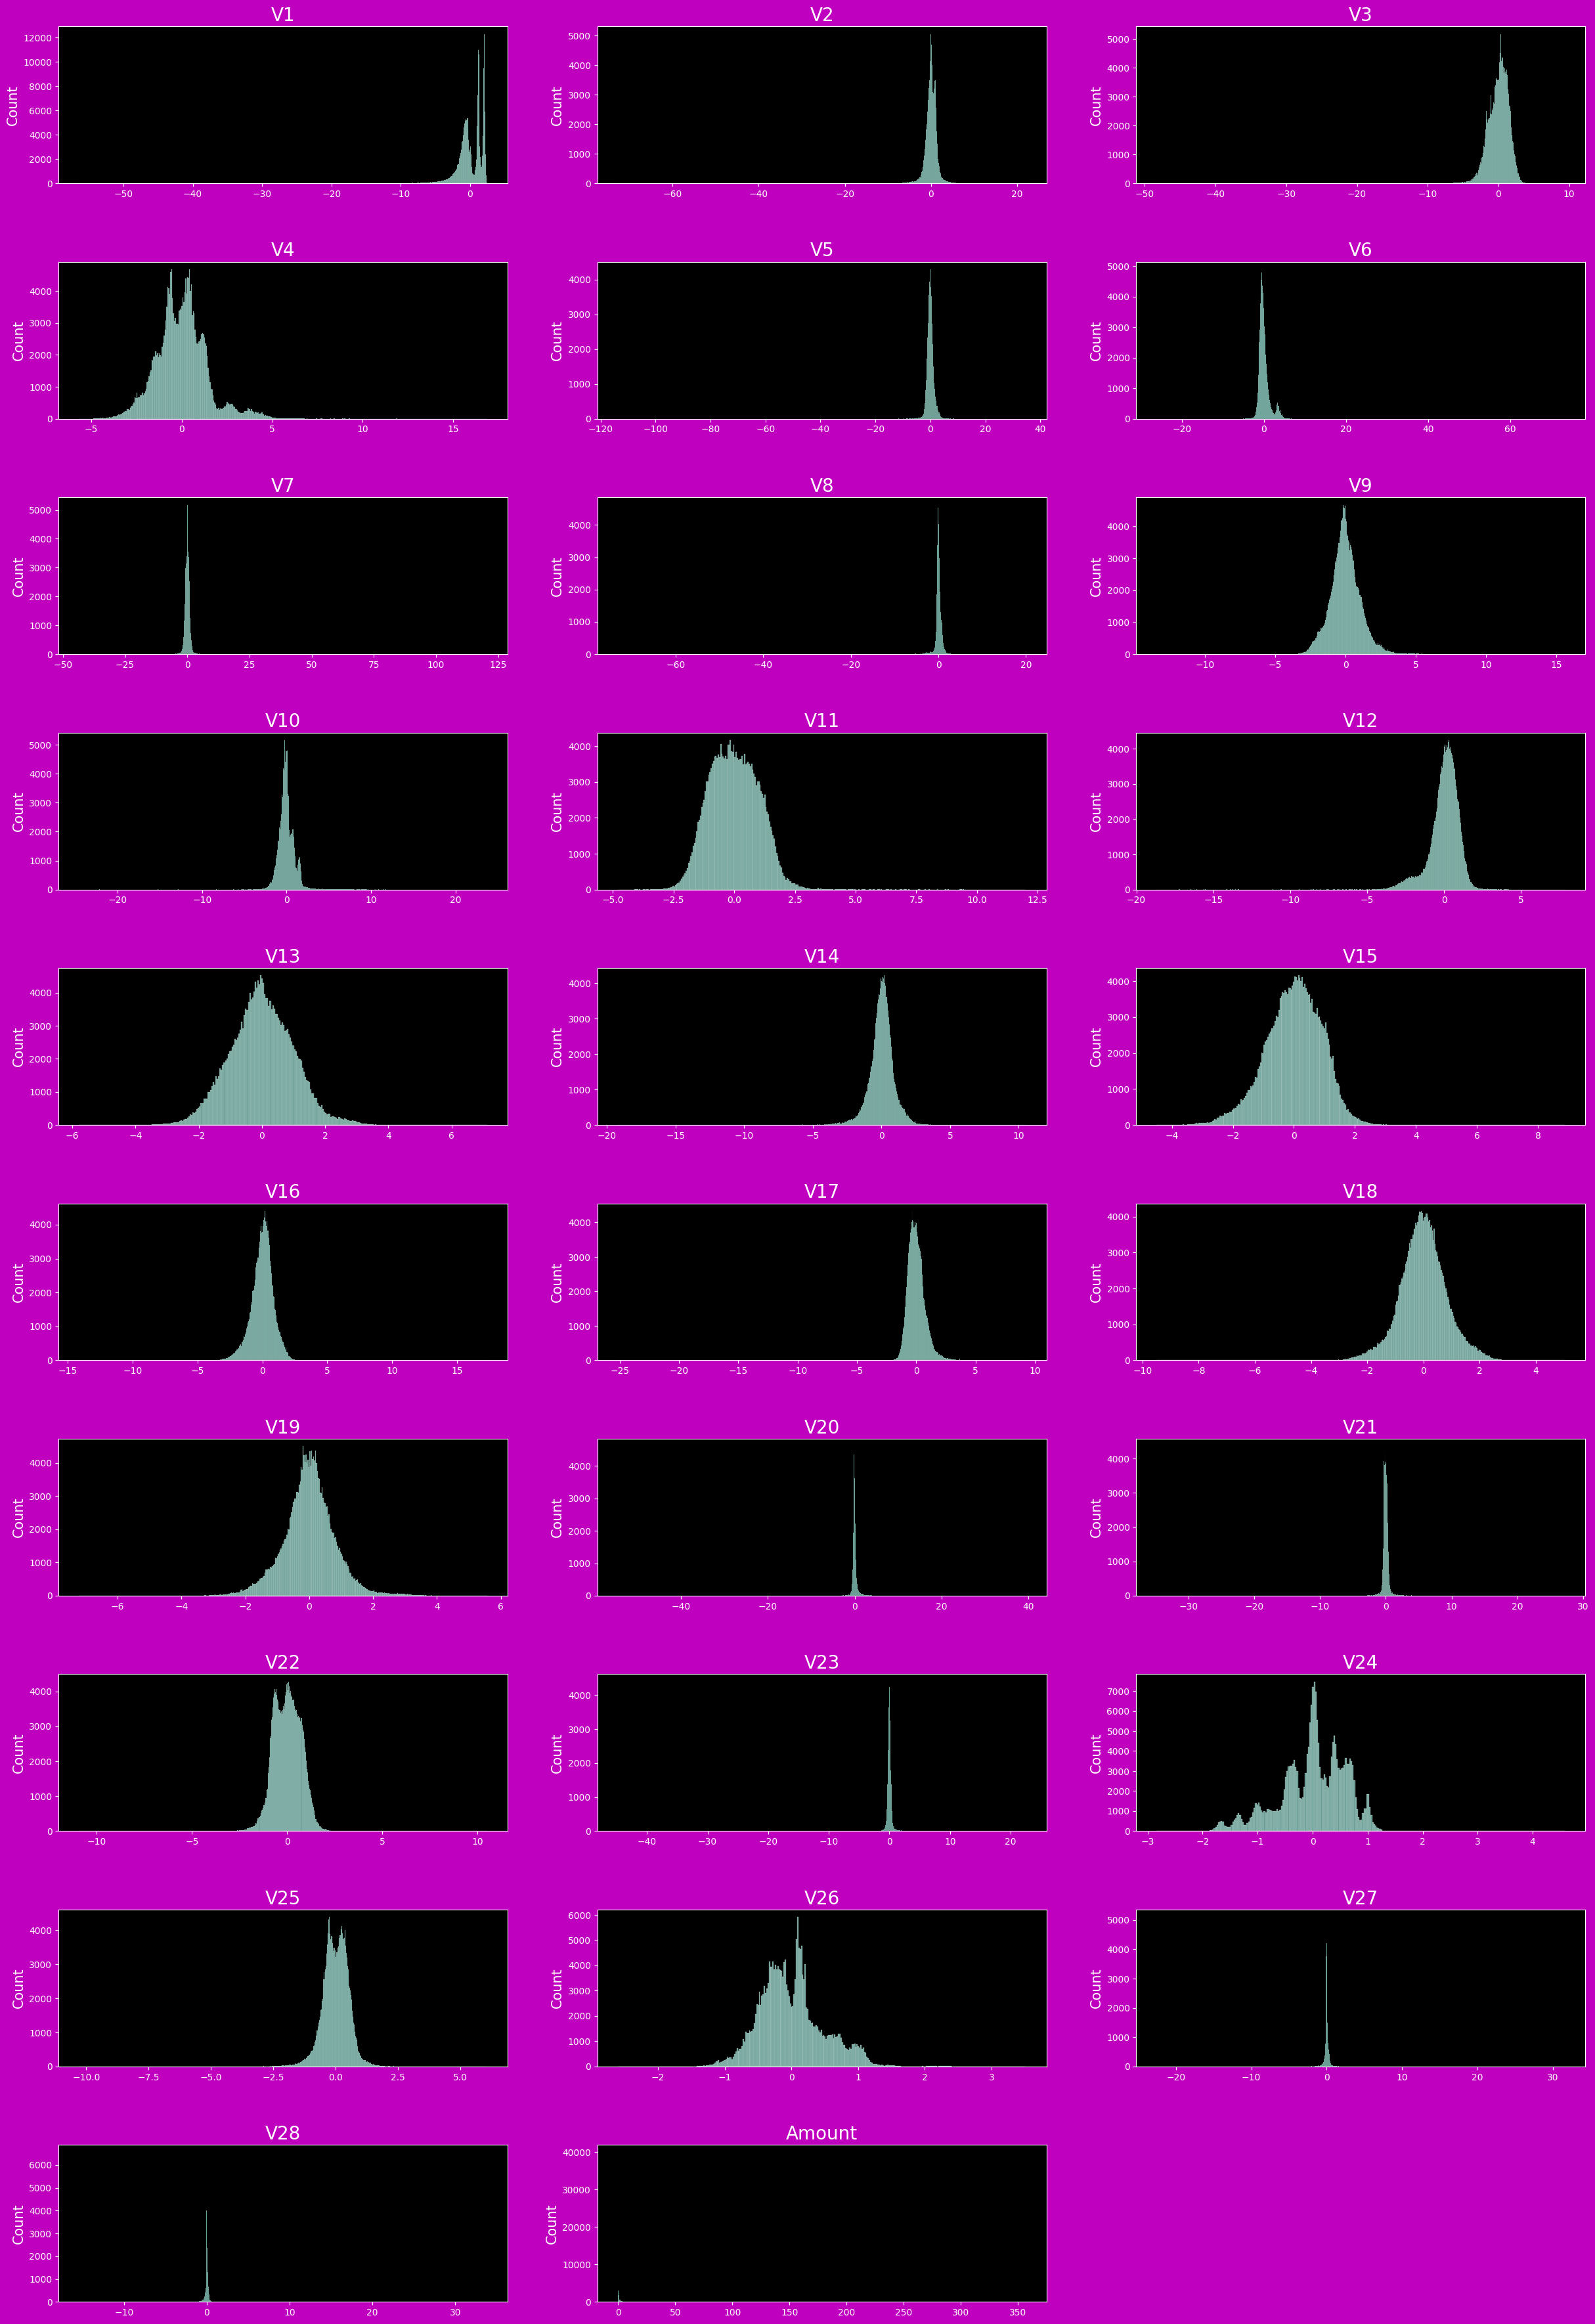

In [30]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m')
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i)
        sns.histplot(X_train[col], ax=ax)
        ax.set_title(col, fontsize=20)
        ax.set_ylabel('Count', fontsize=15)
        ax.set_xlabel('')
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
    plt.show()

#**Model Building with the imbalanced data**

**Going to build models on the below mentioned algorithms , then comparing the best model.**

**1.Logistic Regression**

**2.KNN**

**3.SVM**

**4.Decision Tree**

**5.Random Forest**

**6.XGBoost**

#**Metric selection on the imbalance data**

**We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.**

In [31]:
y_train.value_counts()/y_train.shape

0   0.998271
1   0.001729
Name: Class, dtype: float64

**Creating a Stratified Cross Validation Scheme & Performing a GridSearchCV after narrowing the range of best model**

In [32]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


#**Performing Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



======================================Logistic Regression Classifier:=======================================


C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.387080430984497 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.402829647064209 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.847564935684204 seconds
ROC-AUC Score for val data = 0.9797969874466093
Mean precision val score: 0.885478588591554
Mean recall val score: 0.6295975017349064
Mean f1 val score: 0.7341406860856002


------------------------------------------------------------------------------------------------------------


C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.5213

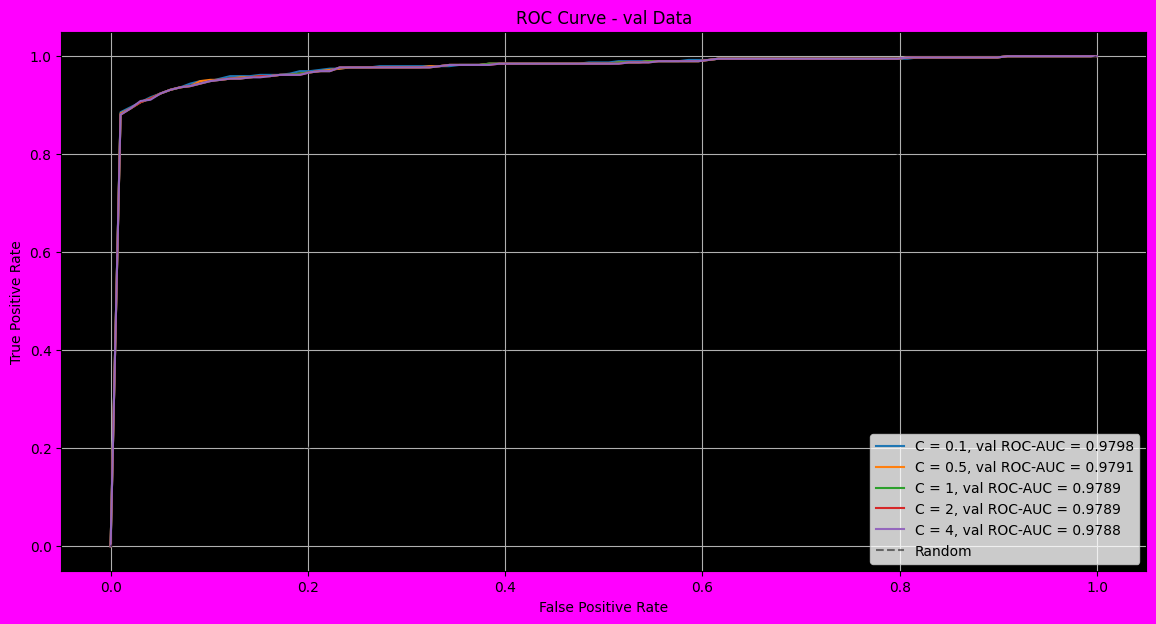

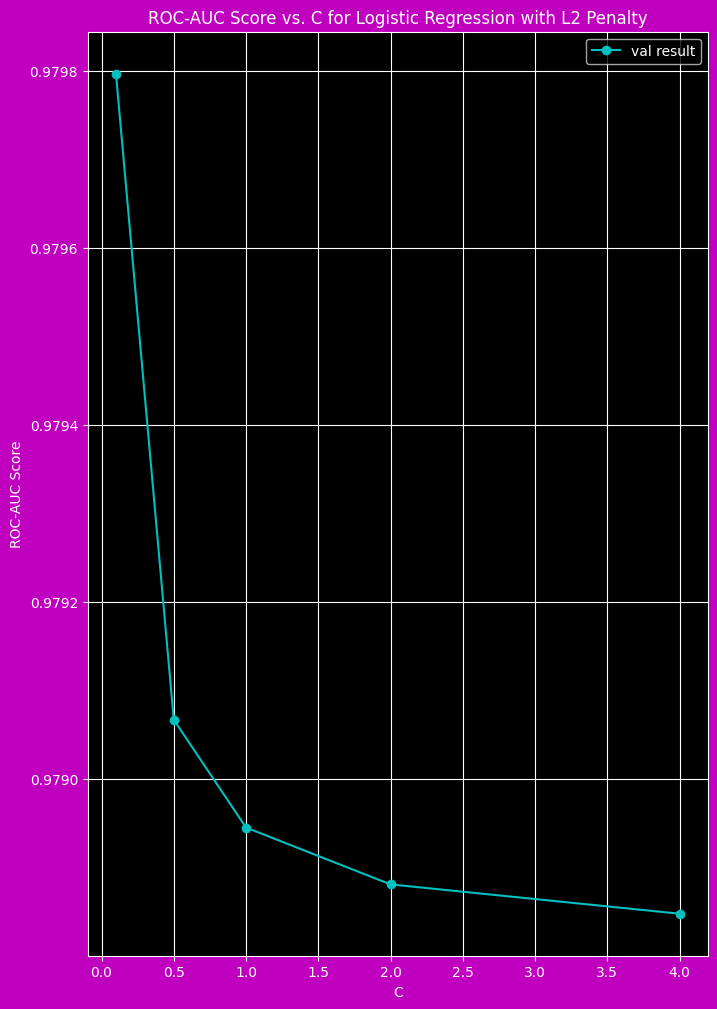





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of C: 
 [0.9797969874466093, 0.9790668817700007, 0.9789450038341578, 0.9788807735548114, 0.9788476359347289]


Best C: 0.1


Best Mean ROC-AUC score for val data: 0.9797969874466093


Mean precision val score for best C 0.885478588591554


Mean recall val score for best C 0.6295975017349064


Mean f1 val score for best C 0.7341406860856002






In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("======================================Logistic Regression Classifier:=======================================")
print("\n")
# Defining our values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates to train and val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)


        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))

        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores to val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))

print("\n")
print("===============================Logistic Regression Has Run Successfully:====================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")
# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')

    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")


**Performing Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [34]:
from sklearn.model_selection import GridSearchCV
params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
#printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")
#printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Time taken: 11.41 seconds


Best ROC AUC score:  0.9812052138770543


Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}




In [35]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9812052138770543
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9797969874466093
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9790668817700007

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.007670919641509045
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.009179067053040193
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.009651062780020628


#**Observations**

**We're seeing a nan value for the score when using the GridSearchCV function in scikit-learn, it typically indicates that the model did not converge or encountered some numerical instability during the training process.**

**This can happen for a variety of reasons, such as**

**1.An insufficient number of iterations,**

**2.A learning rate that's too high or too low,**

**3.A dataset that has features with a wide range of values.**

#**Performing KNN Classifier**

**Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

============================================KNN Classifier:===============================================
K = 3
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 274.896821975708 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 271.47430419921875 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 242.69833302497864 seconds
Mean ROC-AUC for train data: 0.9999479085933528
Mean ROC-AUC for val data: 0.9110686212594891
------------------------------------------------------------------------------------------------------------


=================================KNN Classifier Has Run Successfully:=======================================


------------------------------------------------------------------------------------------------------------


=====================

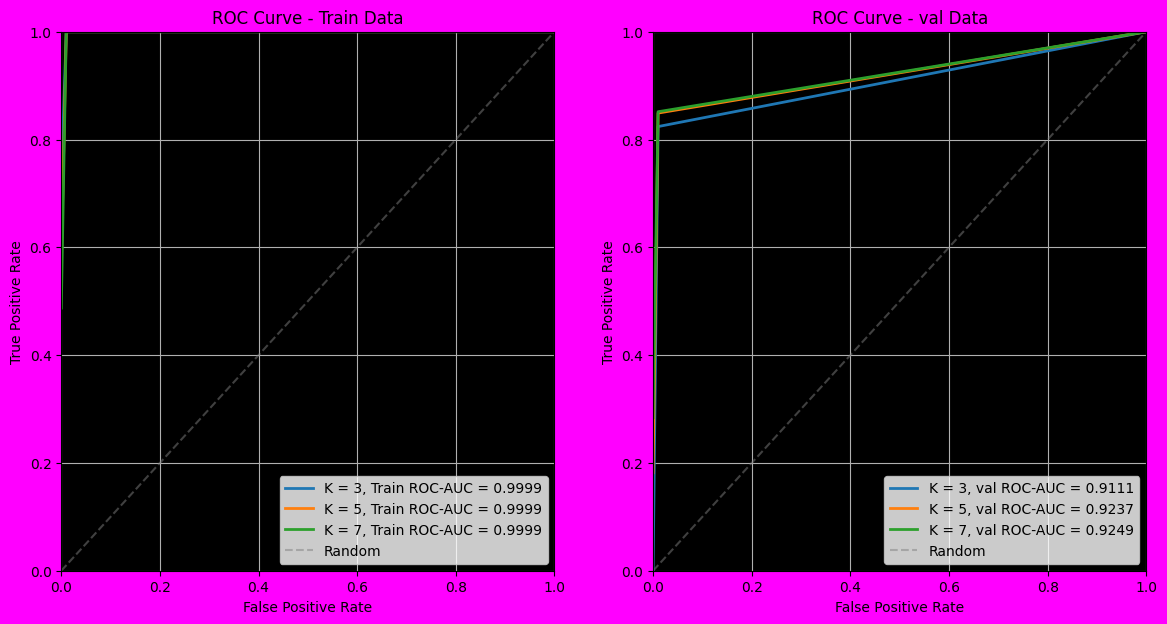

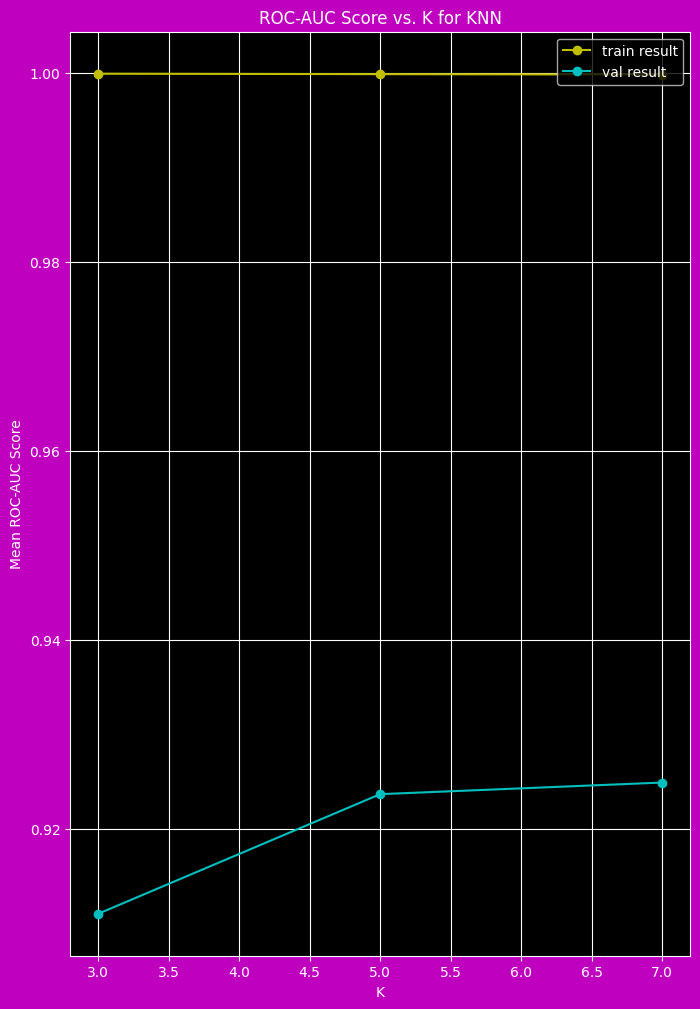





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of K: 
 [0.9999479085933528, 0.9999030150193778, 0.9998607640754523]
Mean ROC-AUC scores for val data for all values of K: 
 [0.9110686212594891, 0.9237188714312442, 0.9249482980359366]


Best K: 7


Best Mean ROC-AUC score for val data: 0.9249482980359366






In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining our values of K (number of neighbors)

K_values = [3, 5, 7]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# Creating subplots for ROC curves

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Defining the KFold object


# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = knn_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0]

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0]

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)
    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_fpr_train = mean_fpr
    ax1.plot(mean_fpr_train, mean_tpr_train, linestyle='-', lw=2, label='K = ' + str(k) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)).format(k))

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)
    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)).format(k))

    print("Mean ROC-AUC for train data:", mean_roc_auc_train)
    print("Mean ROC-AUC for val data:", mean_roc_auc_val)


    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    print("=================================KNN Classifier Has Run Successfully:=======================================")
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    print("======================================Plotting the ROC AUC Curve:===========================================")
    print("\n")

# Plotting ROC curves for train and val data

ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc='lower right')
ax1.grid(True)  # Adding grid to the plot

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(K_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score vs. K for KNN')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for train data for all values of K: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_k = K_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")


print("============================================================================================================")
print("\n")
print("============================================================================================================")

#**Performing SVM Classifier**

**Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("=============================================SVM Classifier:================================================")
print("\n")
# Defining our values of C

C_values = [0.1, 1, 2]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = svm_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("\n")
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    # Plotting ROC curves for train data

    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='C = {}, Train ROC-AUC = {:.4f}'.format(c, mean_roc_auc_train))

    # Plotting ROC curves for val data

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))
print("\n")
print("=========================================SVM Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")
print("\n")

# Setting plot properties for train data

ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curve - Train Data', fontsize=14)
ax1.legend(loc="lower right")
ax1.grid(True)  # Adding grid to the plot

# Setting plot properties for val data

ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")
# Printing mean ROC-AUC scores for train and val data for all values of C

print("Mean ROC-AUC scores for train data for all values of C: \n", mean_roc_auc_scores_train)
print("\n")
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("\n")
print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")



=============================================SVM Classifier:================================================


C = 0.1 Kernel = rbf
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]


**Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Defining the SVM classifier

svm_classifier = svm.SVC()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Prints the mean test scores for each hyperparameter combination

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Prints the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Prints the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("==============================================Decision Tree:================================================")
print("\n")

# Defining your values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")
print("\n")
# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")
# Printing mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("\n")
print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")

**Narrowing max depth to 2,3,4**

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

# Defining the parameters to be tuned

params = {'max_depth': [2, 3, 4],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Printing the time taken to fit the model

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier




print("============================================================================================================")
print("\n")
print("================================================Random Forest:==============================================")
print("\n")

# Defining your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')


# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = rf_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("\n")
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")

    # Plotting ROC curve for the current value of C

    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)))
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=================================Random Forest Has Run Successfully:========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax1.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc="lower right")
ax1.grid(True)  # Adding grid to the plot

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(n_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')

    # plt.xscale('log')

    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of n Estimators

print("Mean ROC-AUC scores for train data for all values of n Estimators: \n", mean_roc_auc_scores_train)
print("\n")
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_n_estimators = n_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

#**Observations**

**Narrowing to Best n Estimators: 400 It is taking Time elapsed: ~ 1517.3193807601929 seconds for each set of 3 folds**


**1. Increasing the number of trees in the forest can improve the performance of the model by reducing the variance and increasing the accuracy of the predictions.**

**2. This is because more trees mean a larger number of votes for the final prediction, leading to more stable and reliable predictions.**

**3. Moreover, increasing the number of trees can help to capture the complex relationships between the features in the dataset, leading to better generalization.**

**So taking the range of n Estimators as [500], which will take nearly 2000 seconds (35 min) to run a set of 3 folds.**



**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

# Defining the hyperparameters grid for tuning

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7],
    }

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        # pre_dispatch=6,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")
print("\n")
print("================================================Random Forest:==============================================")
print("\n")

# Define your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))

print("\n")
print("=================================Random Forest Has Run Successfully:========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower ri0ght")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")
# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("\n")
print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("=======================================Hyperparameter Tuning over:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")
print("\n")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")
print("\n")
print("============================================XGBoost Classifier:=============================================")
print("\n")

# Defining your values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Addinng grid to the plot

# Showing the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")
# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("\n")
print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

**Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**